In [2]:
from tensorflow.keras.models import Sequential

In [3]:
model = Sequential()

In [4]:
from tensorflow.keras.layers import Dense
model.add(Dense(32, input_dim=10))

c:\Users\asgat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam')

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352 (1.38 KB)

 Trainable params: 352 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model = Sequential()
model.add(Dense(32, input_dim=10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523 (2.04 KB)

 Trainable params: 523 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline

In [9]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

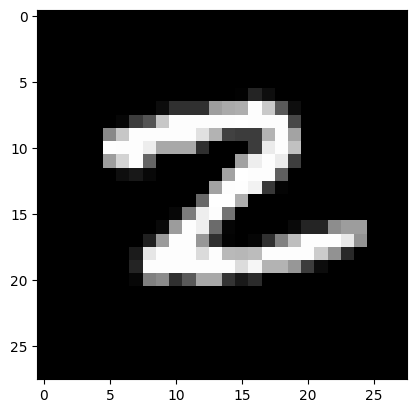

In [10]:
# Номер картинки
n = 143

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [13]:
# Вывод метки класса для n-го изображения
print(y_train_org[n])

2


In [12]:
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [14]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [25]:
CLASS_COUNT = 10

In [24]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [23]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [22]:
# Вывод примера одного выходного вектора
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [16]:
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[36])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000,)
6


In [18]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

c:\Users\asgat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 952,410 (3.63 MB)

 Trainable params: 952,410 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [26]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8873 - loss: 0.3826
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9764 - loss: 0.0791
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9861 - loss: 0.0445
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9911 - loss: 0.0282
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9908 - loss: 0.0271
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9936 - loss: 0.0197
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9948 - loss: 0.0157
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9955 - loss: 0.0143
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9962 - loss: 0.0106
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9959 - loss: 0.0124
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9967 - loss: 0.0095
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 

In [35]:
model.save_weights('model.weights.h5')
model.load_weights('model.weights.h5')

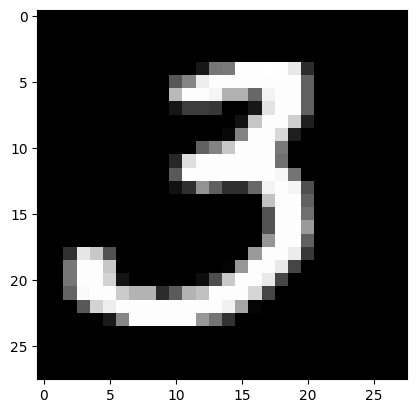

In [28]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [29]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [37]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [38]:
# Распознавание примера
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [39]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[9.3321041e-28 2.0127673e-19 5.5627625e-23 1.0000000e+00 4.0274214e-25
  4.9535138e-16 6.3957073e-34 4.9178176e-23 4.5407017e-21 2.0334088e-14]]


In [40]:
sum(prediction[0])

1.0000000000000209

In [41]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 3


In [42]:
# Вывод правильного ответа для сравнения
print(y_test_org[n_rec])

3
